## **Разведывательный анализ данных (EDA) для модели, предсказывающей результаты экзамена по математике**

### **Цель проекта**

Отследить влияние условий жизни учащихся в возрасте от 15 до 22 лет на их успеваемость по математике, чтобы на ранней стадии выявлять студентов, находящихся в группе риска.

### **Задачи проекта**

Сделать модель, которая предсказывала бы результаты госэкзамена по математике для каждого ученика школы, предварительно определив параметры будущей модели. Для чего необходимо **провести разведывательный анализ данных и составить отчёт по его результатам**.

### **1. Первичный осмотр данных**

In [1]:
# импортируем все необходимые библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from itertools import combinations
from scipy.stats import ttest_ind

# настраиваем параметры отображения
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 50)

# загружаем файл с базой данных по ученикам
stud_math = pd.read_csv('stud_math.xls')

In [2]:
# первичное знакомство с данными
display(stud_math.head(10))

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


In [3]:
# посмотреть тип данных и не пропущенные значения
stud_math.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

В нашем дата сете 30 переменных, из которых 13 числовых и 17 номинативных.

В дата сете есть отсутствующие значения. Поэтому найдем количество значений, которых не хватает в каждой колонке.

In [4]:
# Функция для расчета пропущенных значений в колонках
def missing_values_table(df):
    # Всего пропущенных значений
    mis_val = df.isnull().sum()

    # Процент пропущенных значений
    mis_val_percent = 100 * df.isnull().sum() / len(df)

    # Сделать таблицу с результатами
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)

    # Переименовать колонки
    mis_val_table_ren_columns = mis_val_table.rename(
        columns={0: 'Missing Values', 1: '% of Total Values'})

    # Отсортировать таблицу по убыванию % пропущенных значений
    mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:, 1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)

    # Напечатать вывод
    print("Your dataframe has " + str(df.shape[1]) + " columns.\n"
          "There are " + str(mis_val_table_ren_columns.shape[0]) +
          " columns that have missing values.")

    # Возврат датафрейма с пропущенными значениями
    return mis_val_table_ren_columns

In [5]:
missing_values_table(stud_math)

Your dataframe has 30 columns.
There are 27 columns that have missing values.


,Missing Values,% of Total Values
Pstatus,45,11.4
paid,40,10.1
famsup,39,9.9
Fjob,36,9.1
internet,34,8.6
romantic,31,7.8
guardian,31,7.8
traveltime,28,7.1
famrel,27,6.8
famsize,27,6.8


В теории допустимый процент 25-30%, но он может варьироваться в зависимости от задачи и данных. В нашем датафрейме максимальный процент пропущенных значений 11.4%, что является допустимым, но для чистоты эсперимента заменим пустые числовые значения на среднее (после того, как уберем выбросы), а номинативные пропуски на None.

P.S. В реальных кейсах некорректно "придумывать" данные, но так как при исключении всех пропусков датасет значительно сокращается до 97 строчек, было принято решение сделать замену пропусков.

Проверим так же наш массив на наличие дупликатов:

In [6]:
# расчет дупликатов
if len(stud_math[stud_math.duplicated()]) > 0:
    print("Количество дупликатов: ", len(stud_math[stud_math.duplicated()]))
    print(stud_math[stud_math.duplicated(keep=False)].sort_values(
        by=list(stud_math.columns)).head())
else:
    print("Ура! Дупликатов нет:)")

Ура! Дупликатов нет:)


Дупликатов нет => удалять ничего не нужно => двигаемся дальше.

### **2. Предварительный анализ числовых переменных**

In [7]:
# добавим в список все типы нашего дата сета
list(set(stud_math.dtypes.tolist()))

# выберем из этого списка только числовые переменные
stud_math_num = stud_math.select_dtypes(include=['float64', 'int64'])

# посмотрим на эти числовые переменные
stud_math_num.head()

,age,Medu,Fedu,traveltime,studytime,failures,"studytime, granular",famrel,freetime,goout,health,absences,score
0,18,4.0,4.0,2.0,2.0,0.0,-6.0,4.0,3.0,4.0,3.0,6.0,30.0
1,17,1.0,1.0,1.0,2.0,0.0,-6.0,5.0,3.0,3.0,3.0,4.0,30.0
2,15,1.0,1.0,1.0,2.0,3.0,-6.0,4.0,3.0,2.0,3.0,10.0,50.0
3,15,4.0,2.0,1.0,3.0,0.0,-9.0,3.0,2.0,2.0,5.0,2.0,75.0
4,16,3.0,3.0,1.0,2.0,0.0,-6.0,4.0,3.0,2.0,5.0,4.0,50.0


,age,Medu,Fedu,traveltime,studytime,failures,"studytime, granular",famrel,freetime,goout,health,absences,score
count,395.000000,392.000000,371.000000,367.000000,388.000000,373.000000,388.000000,368.000000,384.000000,387.000000,380.000000,383.000000,389.000000
mean,16.696203,2.750000,2.614555,1.438692,2.038660,0.337802,-6.115979,3.937500,3.231771,3.105943,3.531579,7.279373,52.262211
std,1.276043,1.098127,2.228732,0.694181,0.842078,0.743135,2.526235,0.927277,0.993940,1.115896,1.396019,23.465197,22.919022
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,-12.000000,-1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,-6.000000,4.000000,3.000000,2.000000,3.000000,0.000000,40.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,-6.000000,4.000000,3.000000,3.000000,4.000000,4.000000,55.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,-3.000000,5.000000,4.000000,4.000000,5.000000,8.000000,70.000000
max,22.000000,4.000000,40.000000,4.000000,4.000000,3.000000,-3.000000,5.000000,5.000000,5.000000,5.000000,385.000000,100.000000


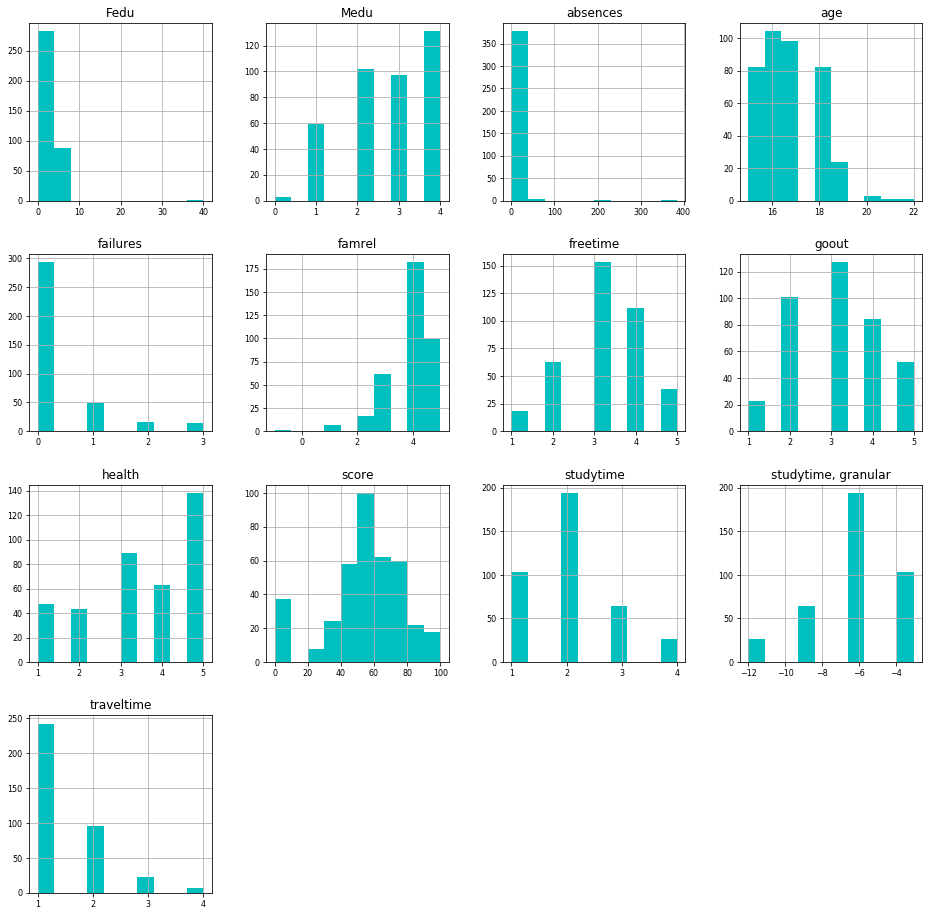

In [8]:
# построим гистограммы для всех числовых переменных и добавим описательные характеристики
stud_math_num.hist(color='c', figsize=(16, 16), xlabelsize=8, ylabelsize=8)
stud_math_num.describe()

Из графиков видно, что у ряда переменных есть выбросы (**Fedu**, **absences**), от которых необходимо избавиться и подозрительные значения, такие как **Score** 0 (что может говорить, как о том, что ученик совсем ничего не сделал по каким-то причинам) и **famrel** меньше 0 (чего быть не может - критерий 0 - 5). Это так же видно по ряду "подозрительных" статистических метрик (максимум у Fedu и absence), что могло быть опечаткой, а возможно это выброс.

В своем анализе мы будем использовать научные методы (без ручных манипуляций, так как в реальной жизни "ручной" метод не является самым эффективным -> автоматизация процессов является более эффективной;)) и для того, чтобы точно определить выбросы используем формулу интерквартильного расстояния, предварительно построив boxplot для визуализации.

Выбросом считаются такие значения, которые лежат вне рамок: *percentile(25) -1.5IQR : percentile(75)+1.5IQR, где IQR = percentile(75) - percentile(25)*

Для начала посмотрим, как разборс квартилей для наших числовых переменных выглядит графически (с помощью boxplot).

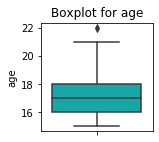

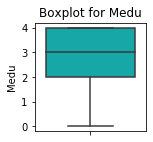

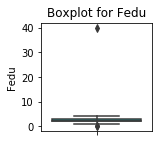

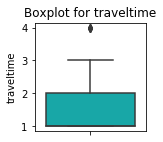

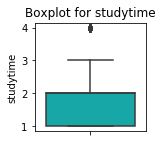

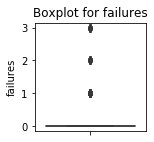

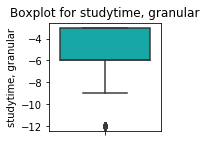

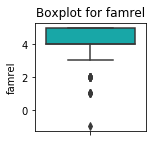

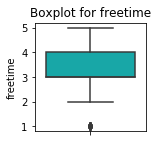

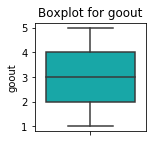

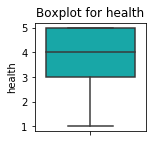

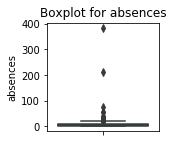

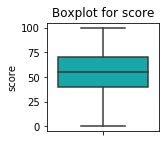

In [9]:
# определяем функцию построения boxplot
def get_boxplot(column):
    fig, ax = plt.subplots(figsize=(2, 2))
    sns.boxplot(y=column, data=stud_math_num, color='c')
    ax.set_title('Boxplot for ' + column)
    plt.show()


# строим boxplot для наших числовых переменных
for i in stud_math_num:
    get_boxplot(i)

Из boxplot, как и из графиков выше видно, что выбросы есть у переменных Fedu и absences (что еще раз подтверждает наше предположение).

### **3. Преобразование числовых переменных**

Применить отсечку по интерквартильному расстоянию для всего массива данных нельзя, так как мы можем упустить важные параметры, измеряемые от 0 до 3 (как параметр failures, например, что так же видно и по boxplot), поэтому преобразуем только те переменные, где видны выбросы и "нелогичности".

Сделаем корректировку данных:
 - Отсечение по квартилям только для переменных с выбросами: **Fedu** и **absences** (можно было бы заменить на медианное значение, но в данном случае это может сильно скосить базу, поэтому так делать не будем).
 - Уберем отрицательное значение **famrel** и нулевые знаения **absences**, так как иначе происходит скос данных.
 - Заменим пустые (но не нулевые) значения на медиану.

In [10]:
# считаем 1ый, 3ий квартили и IQR для Fedu
Q1 = stud_math.Fedu.quantile(0.25)
Q3 = stud_math.Fedu.quantile(0.75)
IQR = Q3 - Q1

# исключаем все значения, которые лежат вне интерквартильного расстояния
stud_math = stud_math[(stud_math['Fedu'] > (Q1 - 3 * IQR)) &
                      (stud_math['Fedu'] < (Q3 + 3 * IQR))]

In [11]:
# считаем 1ый, 3ий квартили и IQR для absences
Q1 = stud_math.absences.quantile(0.25)
Q3 = stud_math.absences.quantile(0.75)
IQR = Q3 - Q1

# исключаем все значения, которые лежат вне интерквартильного расстояния
stud_math = stud_math[(stud_math['absences'] > (Q1 - 3 * IQR)) &
                      (stud_math['absences'] < (Q3 + 3 * IQR))]

In [12]:
# исключаем отрицательные значения famrel и нулевые absences
stud_math = stud_math.loc[stud_math.famrel > 0]
stud_math = stud_math.loc[stud_math.absences > 0]

In [13]:
# вставляем средние значения для пустых числовых ячеек
stud_math = stud_math.apply(lambda x: x.fillna(
    x.mean()) if x.dtypes == 'float64' or x.dtypes == 'int64' else x)

,age,Medu,Fedu,traveltime,studytime,failures,"studytime, granular",famrel,freetime,goout,health,absences,score
count,232.000000,232.000000,232.000000,232.000000,232.000000,232.000000,232.000000,232.000000,232.000000,232.000000,232.000000,232.000000,232.000000
mean,16.745690,2.769565,2.469828,1.481481,2.030837,0.310185,-6.092511,3.900862,3.233480,3.164444,3.408072,7.116379,56.359649
std,1.262163,1.098576,1.092653,0.696080,0.834287,0.703170,2.502862,0.927501,1.003512,1.046362,1.357783,5.607608,15.712309
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,-12.000000,1.000000,1.000000,1.000000,1.000000,1.000000,20.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,-6.000000,3.000000,3.000000,2.000000,2.000000,3.000000,45.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,-6.000000,4.000000,3.000000,3.000000,3.408072,6.000000,55.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.077546,-3.000000,5.000000,4.000000,4.000000,5.000000,10.000000,65.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,-3.000000,5.000000,5.000000,5.000000,5.000000,28.000000,100.000000


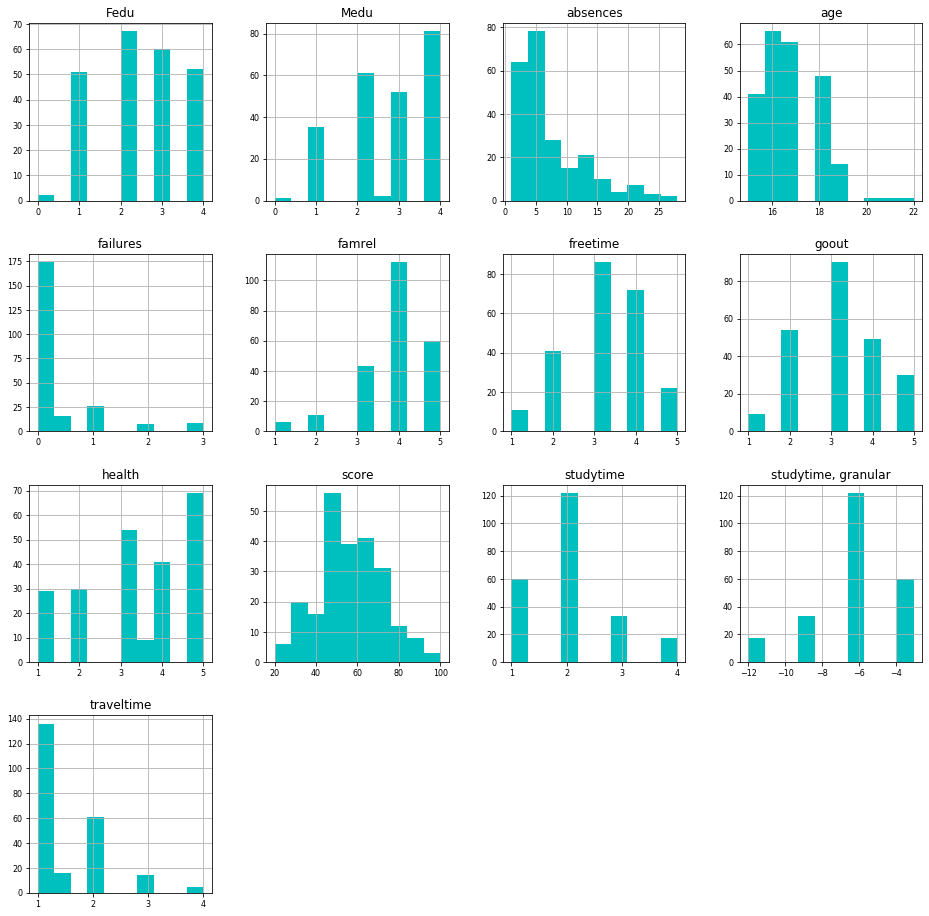

In [14]:
# снова построим гистограммы для всех числовых переменных и посмотрим описательные характеристики
stud_math_num = stud_math.select_dtypes(include=['float64', 'int64'])
stud_math_num.hist(color='c', figsize=(16, 16), xlabelsize=8, ylabelsize=8)
stud_math_num.describe()

Теперь данные выглядят чище и с ними можно работать дальше.

### **4. Корреляционный анализ числовых переменных**

Для того чтобы понять, какие параметры стоит оставить, а какие — исключить, построим корреляционный анализ для числовых переменных.

Для начала построим **графики зависимости переменных между собой**:

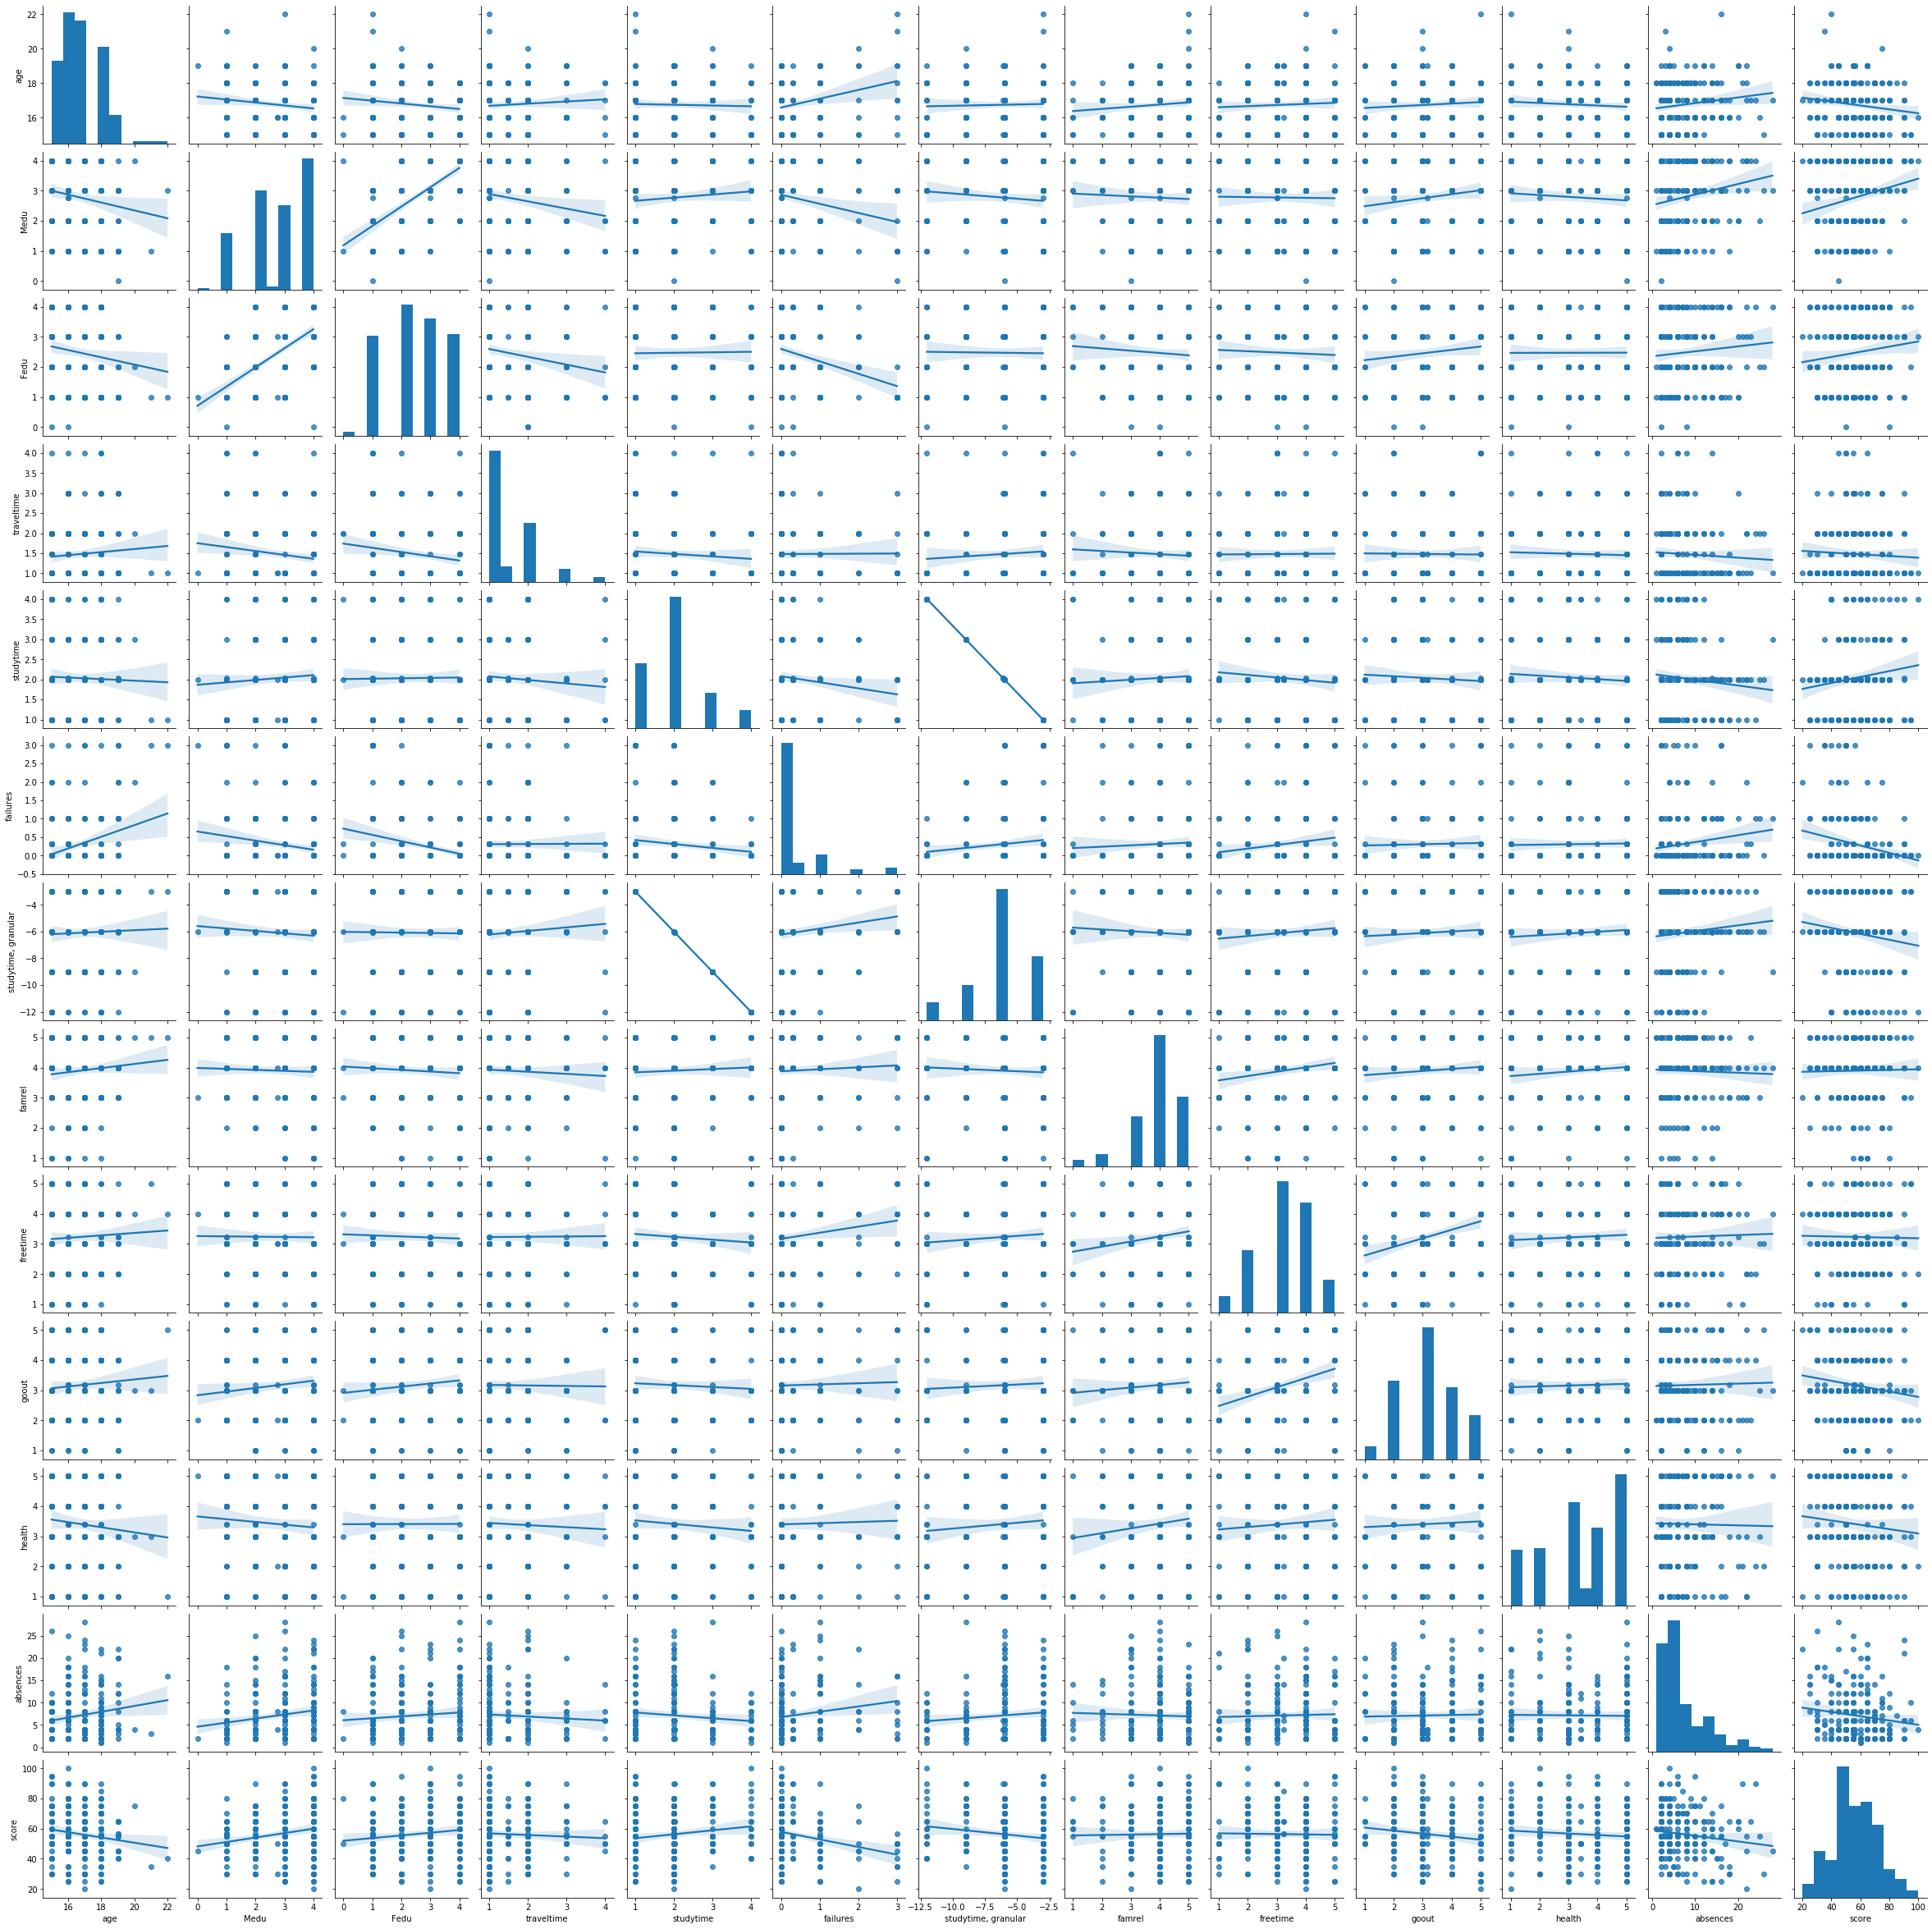

In [15]:
sns.pairplot(stud_math_num, kind='reg')

Но они слишком мелкие и плохо читаются, поэтому сделаем для наглядности **матрицу корреляций**:

In [16]:
stud_math_num.corr()

,age,Medu,Fedu,traveltime,studytime,failures,"studytime, granular",famrel,freetime,goout,health,absences,score
age,1.000000,-0.150280,-0.138995,0.068983,-0.029774,0.284214,0.029774,0.093006,0.051072,0.070598,-0.079146,0.146712,-0.140653
Medu,-0.150280,1.000000,0.638758,-0.153689,0.079433,-0.192874,-0.079433,-0.038533,-0.011462,0.126743,-0.073342,0.178267,0.205672
Fedu,-0.138995,0.638758,1.000000,-0.165272,0.012531,-0.264920,-0.012531,-0.064903,-0.038228,0.108173,0.002054,0.084299,0.123666
traveltime,0.068983,-0.153689,-0.165272,1.000000,-0.073423,0.004765,0.073423,-0.052897,0.007055,-0.010748,-0.035403,-0.056972,-0.047506
studytime,-0.029774,0.079433,0.012531,-0.073423,1.000000,-0.126823,-1.000000,0.048896,-0.078416,-0.049649,-0.071279,-0.096222,0.139250
failures,0.284214,-0.192874,-0.264920,0.004765,-0.126823,1.000000,0.126823,0.048953,0.141376,0.025479,0.020825,0.149808,-0.225505
"studytime, granular",0.029774,-0.079433,-0.012531,0.073423,-1.000000,0.126823,1.000000,-0.048896,0.078416,0.049649,0.071279,0.096222,-0.139250
famrel,0.093006,-0.038533,-0.064903,-0.052897,0.048896,0.048953,-0.048896,1.000000,0.156292,0.077119,0.109291,-0.032730,0.017523
freetime,0.051072,-0.011462,-0.038228,0.007055,-0.078416,0.141376,0.078416,0.156292,1.000000,0.295970,0.059293,0.027257,-0.015721
goout,0.070598,0.126743,0.108173,-0.010748,-0.049649,0.025479,0.049649,0.077119,0.295970,1.000000,0.036759,0.021707,-0.133555


Из таблицы корреляций мы видим следующее:
- Важно отметить, что коэффициенты корреляции в данной выборке не самые высокие;
- Проверка данных по «Правилу большого пальца» говорит о том, что может возникать проблема мультиколлинеарности, когда в корреляционной матрице, формируемой набором независимых переменных, присутствует одна корреляция > 0.90 или несколько корреляций > 0.70. В нашем случае это касается переменной **studytime, granular**, котороая является противоположной величиной к studytime и имеет с ней корреляцию -1 => эту переменную нужно исключить из рассмотрения. Других переменных с коэффициентом корреляции выше +/- 0.9 нет.
- Положительный коээфициент говорит о том, что при увеличении 1 переменной, другая тоже увеличивается и наоборот, при отрицательном коэффиценте корреляции, мы будем наблюдать разнонаправленные тренды. Так, например, **образование отца и матери** имеют достаточно высокую положительную корреляцию, что говорит о том, что уровень образования в семье у обоих родителей аналогичен. Если бы этот коэффициент был бы >0.7, то мы бы исключили этй переменную из нашей выборки, но это не так, поэтому оставляем Fedu. Важно отметить, что в целом обе переменные имеют аналогичную корреляцию с другими, за исключением studytime и health. Но так как уровень корреляции с ними достаточно низкий, этим можно пренебречь.
- У **возраста** высокая положительная корреляция с неудачами, что говорит о возможном накопившемся опыте.
- **Неудачи** имеют достаточно высокую негативную корреляцию с баллом и с образованием отца и матери, что говорит о том, что в семьях с низким уровнем образования, большее количество неудач, которые в свою очередь негативно сказываются на баллах.
- **Свободное время** тесно связано с временем, проведенным с друзьями, что вполне логично, но при этом имеет разный коэффициент с тотал score, что говорит о том, что время с друзьями негативно сказывается на тотал оценке, в то время как, в принципе свободное время, проведенное в отдыхе, оказывает положительное воздействие.
- **Здоровье** положительно связано со временем, проведенным с семьей (психология в чистом виде ;)).
- Чем старше ребенок, тем больше он **пропускает**.

И так как нас интересует корреляция переменных с оценками (поле score), для простоты анализа сделаем также **список корреляций с полем score**:

In [17]:
stud_math_num.corr()['score'][:-1].sort_values(ascending=False)

Medu                   0.205672
studytime              0.139250
Fedu                   0.123666
famrel                 0.017523
freetime              -0.015721
traveltime            -0.047506
health                -0.083254
goout                 -0.133555
absences              -0.134193
studytime, granular   -0.139250
age                   -0.140653
failures              -0.225505
Name: score, dtype: float64

Из представленного списка для дальнейшего рассмотрения оставим те переменные, которые не имеют высокого уровня корреляции между собой и имеют высокую степень корреляции с score, а именно: **Medu, Fedu, studytime** имеют положительную корреляцию с оценкой, что говорит нам о том, что наличие образования у родителей и время проведенное за учебой положительно влияют на итоговую оценку.
С другой стороны, **failures, age, absences, goout** имеют негативную выссокую корреляцию, что говорит нам о том, что неудачи сильнее сказываются на оценке, чем остальные факторы, а так же, чем старше ребенок, больше у него пропусков и гулянок, тем хуже он учится.
Все остальные переменные исключаем из рассмотрения, так как у них низкий уровень корреляции

In [18]:
# исключаем из рассмотрения переменные с низкой корреляцией vs score (<0.1) и высокой с 1 из переменных
stud_math.drop(['famrel', 'freetime', 'traveltime', 'health',
                'studytime, granular'], inplace=True, axis=1)

### **5. Предварительный анализ номинативных переменных**

In [19]:
# объеденим все качественные переменные в 1 список
list(set(stud_math.dtypes.tolist()))
stud_math_quant = stud_math.select_dtypes(include=['object'])
stud_math_quant.head()

,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
0,GP,F,U,NaN,A,at_home,teacher,course,mother,yes,no,no,no,yes,yes,NaN,no
1,GP,F,U,GT3,NaN,at_home,other,course,father,no,yes,no,no,no,yes,yes,no
2,GP,F,U,LE3,T,at_home,other,other,mother,yes,no,NaN,no,yes,yes,yes,NaN
3,GP,F,U,GT3,T,health,NaN,home,mother,no,yes,yes,yes,yes,yes,yes,yes
4,GP,F,U,GT3,T,other,other,home,father,no,yes,yes,no,yes,yes,no,no


Посмотрим сколько у нас уникальных значений в каждом из полей.

In [20]:
# считаем количество уникальных значений для каждого поля
stud_math_quant.nunique()

school        2
sex           2
address       2
famsize       2
Pstatus       2
Mjob          5
Fjob          5
reason        4
guardian      3
schoolsup     2
famsup        2
paid          2
activities    2
nursery       2
higher        2
internet      2
romantic      2
dtype: int64

Также мы хотим посмотреть на то, какие же все-таки значения содержатся в каждой из переменных и в каком количестве.

In [21]:
for i in stud_math_quant.columns:
    print("Данные переменной", i)
    print(stud_math_quant[i].value_counts())

Данные переменной school
GP    206
MS     26
Name: school, dtype: int64
Данные переменной sex
F    122
M    110
Name: sex, dtype: int64
Данные переменной address
U    170
R     53
Name: address, dtype: int64
Данные переменной famsize
GT3    151
LE3     67
Name: famsize, dtype: int64
Данные переменной Pstatus
T    184
A     20
Name: Pstatus, dtype: int64
Данные переменной Mjob
other       71
services    57
at_home     38
teacher     31
health      23
Name: Mjob, dtype: int64
Данные переменной Fjob
other       127
services     52
teacher      16
health        9
at_home       9
Name: Fjob, dtype: int64
Данные переменной reason
course        74
reputation    64
home          60
other         25
Name: reason, dtype: int64
Данные переменной guardian
mother    152
father     46
other      17
Name: guardian, dtype: int64
Данные переменной schoolsup
no     192
yes     32
Name: schoolsup, dtype: int64
Данные переменной famsup
yes    127
no      80
Name: famsup, dtype: int64
Данные переменной pai

Судя по данным в основном в полях по 2 варианта ответа yes,no, либо по 2 классификации для многих номинативных параметоров. Большая вариативность есть только в переменных про работу родителей, причине выбора школы и поле опекун.
Обратим так же внимание на то, что первичный осмотр данных показал, что необходимости корректировать внутренние составляющие номинативных полей нет, так как там нет вариативности, нет дубликатов и все значения однозначны и понятны. Ошибок, судя по количеству уникальных значений, нет.

Посмотрим так же на описательные характеристики наших переменных.

In [22]:
# описательные характеристики номинативных переменных
stud_math_quant.describe()

,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
count,232,232,223,218,204,220,213,223,215,224,207,206,225,223,221,211,211
unique,2,2,2,2,2,5,5,4,3,2,2,2,2,2,2,2,2
top,GP,F,U,GT3,T,other,other,course,mother,no,yes,no,yes,yes,yes,yes,no
freq,206,122,170,151,184,71,127,74,152,192,127,114,119,174,211,174,143


Из таблицы выше по количеству записей видно, что в таблице есть пропуски (что мы уже видели ранее). С чем мы будем работать при обработке данных.

### **6. Анализ и обработка номинативных переменных**

Посмотрим,как различается score в зависимости от значения номинативных переменных. Сделаем это с помощью box-plot.

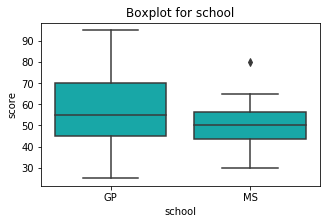

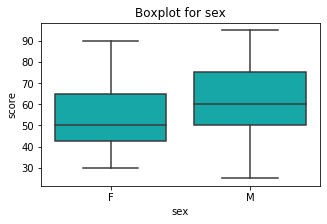

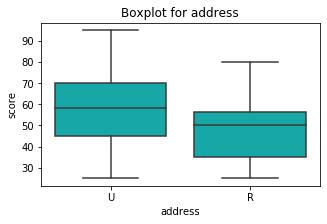

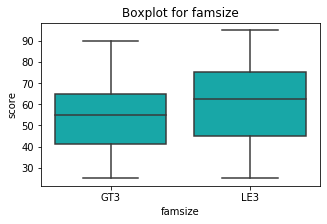

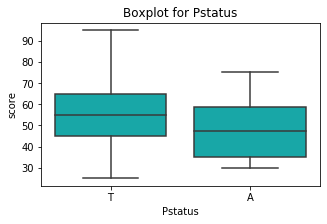

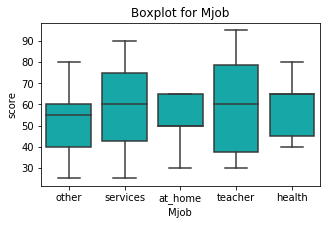

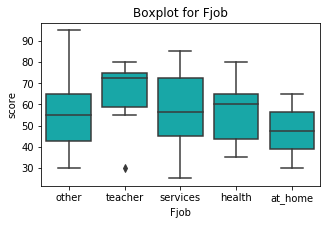

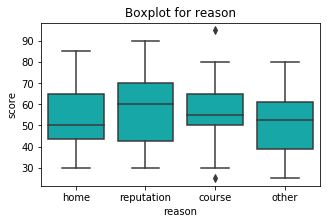

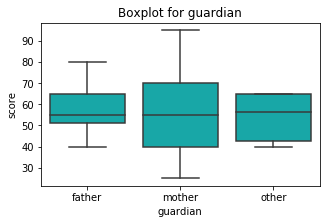

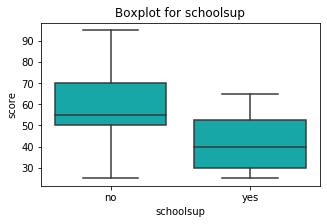

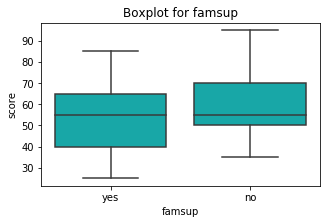

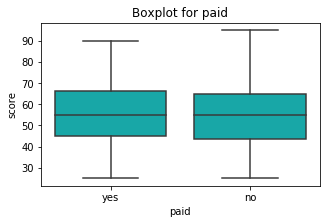

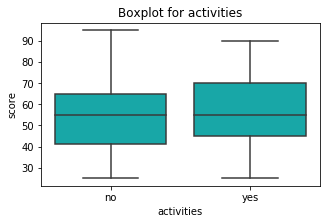

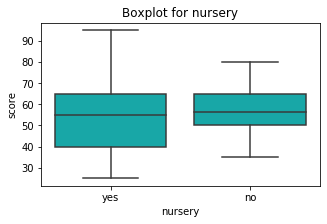

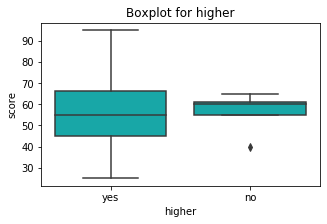

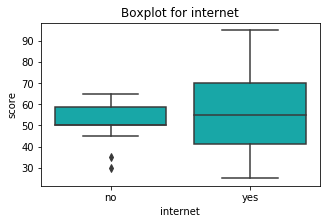

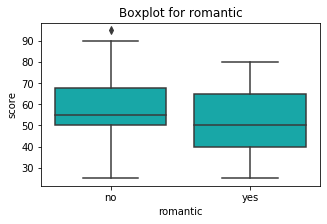

In [23]:
# функция построения boxplot без пустых значений
def boxplot(column):
    fig, ax = plt.subplots(figsize=(5, 3))
    sns.boxplot(x=column, y='score',
                data=stud_math.dropna(),
                ax=ax,
                color='c')
    ax.set_title('Boxplot for ' + column)
    plt.show()


# строим boxplot для номинативных переменных
for x in stud_math_quant:
    boxplot(x)

В качестве дополнительной оценки номинативных данных, мы также можем посмотреть на дистрибуцию переменных. Проделаем данное упражнение.

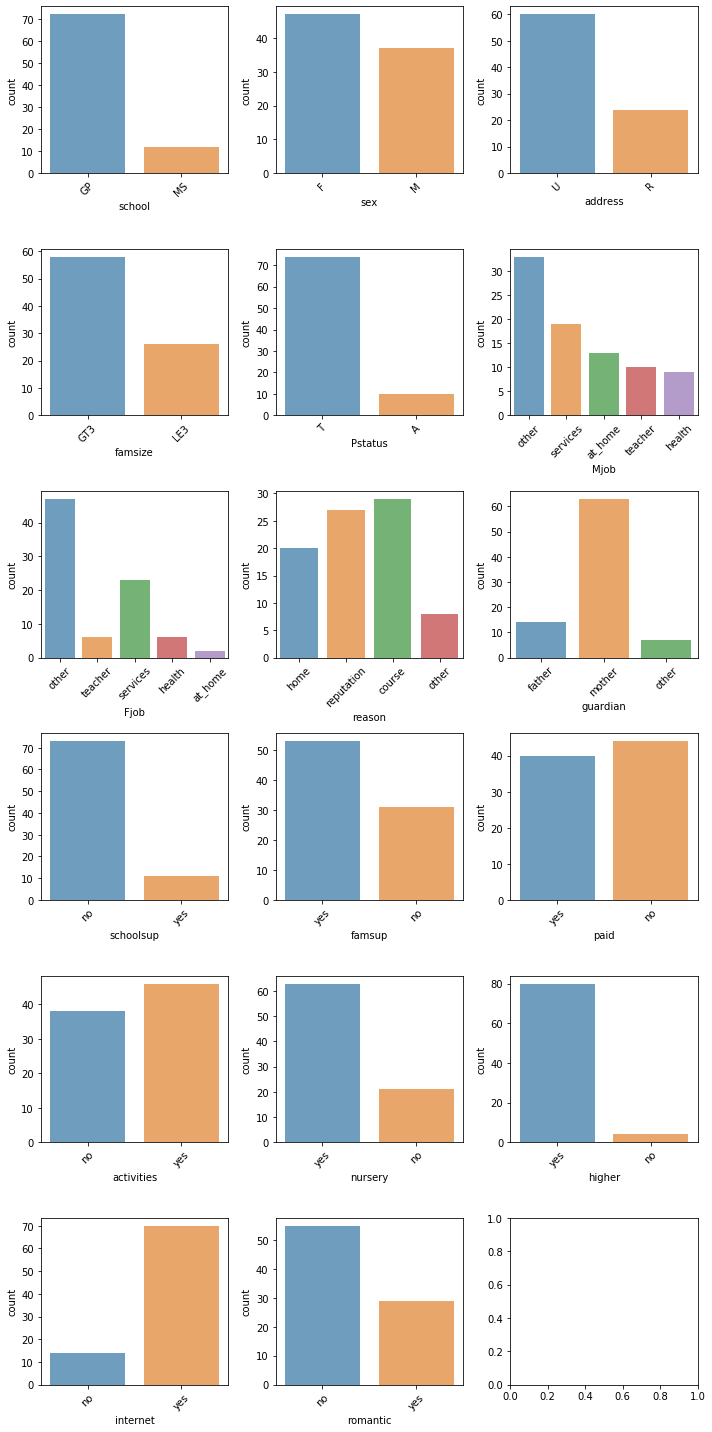

In [24]:
# задаем параметры subplot
fig, axes = plt.subplots(
    round(len(stud_math_quant.columns) / 3), 3, figsize=(10, 20))

# прописываем функцию для номинативных параметров
for i, ax in enumerate(fig.axes):
    if i < len(stud_math_quant.columns):
        ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=45)
        sns.countplot(
            x=stud_math_quant.columns[i], alpha=0.7, data=stud_math_quant.dropna(), ax=ax)

# строим графики в определенном лэйауте
fig.tight_layout()

Из графиков видно, что некоторые переменные имеют доминирующие параметры, что может помешать нам в построении модели.

На первый взгляд разная распределенность boxplots по всем переменным, кроме **paid**, говорит о влиянии на итоговую оценку.Но графики являются вспомогательным инструментом,в то время, как о значимости различий может говорить статистика. Проверим, есть ли статистическая разница в распределении оценок по номинативным признакам, с помощью теста Стьюдента. Проверим нулевую гипотезу о том, что распределения оценок батончиков по различным параметрам неразличимы, предварительно заменив пропуски на None.

In [25]:
# заменяем пропуски на None для пустых номинативных значений
stud_math = stud_math.astype(object).replace(np.nan, 'None')

# еще раз перезаписываем данные в нашу выборку номинативных переменных
stud_math_quant = stud_math.select_dtypes(include=['object'])

# функция расчета теста Стьюдента (перебор всех возможных комбинаций)


def get_stat_dif(column):
    cols = stud_math.loc[:, column].value_counts().index[:]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(stud_math.loc[stud_math.loc[:, column] == comb[0], 'score'],
                     stud_math.loc[stud_math.loc[:, column] == comb[1], 'score']).pvalue \
                <= 0.05/len(combinations_all):
            print('Найдены статистически значимые различия для колонки'+column)
        break


# проверим наши номинативные переменные согласно тесту Стьюдента
for col in stud_math_quant:
    get_stat_dif(col)

Найдены статистически значимые различия для колонкиschoolsup


Мы видим,что серьёзно отличается только: **schoolsup**. Оставим эту переменную в датасете для дальнейшего построения модели.

Итак, в нашем случае важные переменные, которые, возможно, оказывают влияние на оценку, это: **Medu, Fedu, studytime, failures, age, absences, goout, schoolsup** => оставим только их в модели.

In [26]:
stud_for_model = stud_math.loc[:, [
    'Medu', 'Fedu', 'studytime', 'failures', 'age', 'absences', 'goout', 'schoolsup']]
stud_for_model.head()

,Medu,Fedu,studytime,failures,age,absences,goout,schoolsup
0,4.0,4.0,2.0,0.0,18,6.0,4.0,yes
1,1.0,1.0,2.0,0.0,17,4.0,3.0,no
2,1.0,1.0,2.0,3.0,15,10.0,2.0,yes
3,4.0,2.0,3.0,0.0,15,2.0,2.0,no
4,3.0,3.0,2.0,0.0,16,4.0,2.0,no


### **7. Основные выводы**

В результате разведывательного анализа данных мы пришли к следующим выводам:


- Первичный осмотр данных показал, что в дата сете из 30 переменных меньше числовых (13) и больше номинативных (17). При этом в дата сете есть отсутствующие значения - максимальный процент пропущенных значений 11.4%, что является допустимым, но для чистоты эсперимента мы заменили пустые числовые значения на среднее (после того, как уберали выбросы), а номинативные пропуски заменили на None. Дупликатов в базе не было.


- Анализ числовых переменных показал, что у ряда переменных есть выбросы (Fedu, absences), от которых необходимо избавиться и подозрительные значения, такие как Score 0 (что может говорить, как о том, что ученик совсем ничего не сделал по каким-то причинам) и famrel меньше 0 (чего быть не может - критерий 0 - 5). Это так же видно по ряду "подозрительных" статистических метрик (например, странный максимум у Fedu и absence). Наличие выбросов было проверено с помощью boxplot, показывающего разборс квартилей, где видно, что выбросы есть у тех же переменных Fedu и absences.


- Нами также были преобразованы числовые переменные путем отсечения по квартилям переменных с выбросами: Fedu и absences, убераны отрицательные значения famrel и нулевые значения absences, а пустые значения заменены на медиану.


- В ходе корреляционного анализа мы пришли к следующим выводам:
    - Коэффициенты корреляции в данной выборке не самые высокие, что говорит нам о средней качестве связей между переменными;
    - Проверка данных по «Правилу большого пальца» говорит о том, что может возникать проблема мультиколлинеарности, когда в корреляционной матрице, формируемой набором независимых переменных, присутствует одна корреляция > 0.90 или несколько корреляций > 0.70. В нашем случае это касается переменной **studytime, granular**, котороая является противоположной величиной к studytime и имеет с ней корреляцию -1 => эту переменную нужно исключить из рассмотрения. Других переменных с коэффициентом корреляции выше +/- 0.9 нет.
    - **Образование отца и матери** имеют достаточно высокую положительную корреляцию, что говорит о том, что уровень образования в семье у обоих родителей аналогичен. Если бы этот коэффициент был бы >0.7, то мы бы исключили этй переменную из нашей выборки, но это не так, поэтому оставляем Fedu. Важно отметить, что в целом обе переменные имеют аналогичную корреляцию с другими, за исключением studytime и health. Но так как уровень корреляции с ними достаточно низкий, этим можно пренебречь.
    - У **возраста** высокая положительная корреляция с неудачами, что говорит о возможном накопившемся опыте.
    - **Неудачи** имеют достаточно высокую негативную корреляцию с баллом и с образованием отца и матери, что говорит о том, что в семьях с низким уровнем образования, большее количество неудач, которые в свою очередь негативно сказываются на баллах.
    - **Свободное время** тесно связано с временем, проведенным с друзьями, что вполне логично, но при этом имеет разный коэффициент с тотал score, что говорит о том, что время с друзьями негативно сказывается на тотал оценке, в то время как, в принципе свободное время, проведенное в отдыхе, оказывает положительное воздействие.
    - **Здоровье** положительно связано со временем, проведенным с семьей (психология в чистом виде ;)).
    - **Чем старше** ребенок, тем больше он пропускает.
    - Переменные, которые не имеют высокого уровня корреляции между собой, и имеют высокую степень корреляции со score, и которые мы оставим для модели: **Medu, Fedu, studytime** имеют положительную корреляцию с оценкой, что говорит нам о том, что наличие образования у родителей и время проведенное за учебой положительно влияют на итоговую оценку. С другой стороны, **failures, age, absences, goout** имеют негативную выссокую корреляцию, что говорит нам о том, что неудачи сильнее сказываются на оценке, чем остальные факторы, а так же, чем старше ребенок, больше у него пропусков и гулянок, тем хуже он учится.


- Анализ номинативных переменных показал, что основном в полях по 2 варианта ответа yes,no, либо по 2 классификации для многих номинативных параметоров. Большая вариативность есть только в переменных про работу родителей, причине выбора школы и поле опекун. Обратим так же внимание на то, что первичный осмотр данных показал, что необходимости корректировать внутренние составляющие номинативных полей нет, так как там нет вариативности, нет дубликатов и все значения однозначны и понятны. Ошибок, судя по количеству уникальных значений, нет.


- В ходе анализа зависимотей номинативных переменных с помощью box-plot на первый взгляд разная распределенность была по всем переменным, кроме **paid**.Но так как графики являются вспомогательным инструментом, мы проверили, есть ли статистическая разница в распределении оценок по номинативным признакам, с помощью теста Стьюдента. И увидели,что серьёзно отличается только: **schoolsup**, который мы и оставим в датасете для дальнейшего построения модели.


Итак, в нашем случае важные переменные, которые будут включены в модель по итогам всей аналитики: **Medu, Fedu, studytime, failures, age, absences, goout, schoolsup**.